# Generation of a 'one month' dataframe from a l1c product

In [56]:
import glob
import os
import pandas as pd
import sys 
import numpy as np
from matplotlib import pyplot as plt

path_tools = '/home1/datahome/ljessel/'   # path to the python script directory
sys.path.append(path_tools)
from L1B_nc_conversion_L1C_csv.l1c_conversion_approp import L1CConverter

## 0) loading the l1c files

In [4]:
path = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1c/4.1/'
safe = 'S1B_IW_XSP__1SDV_202102*.SAFE'
fns = glob.glob(path+safe+'/*.nc')  # the iw2 sub_swaths have a 5 tile_sample whereas the 2 others (iw1 et iw3) have a 4 tile_sample
# print(len(fns))# 3102 nc_files for 02/2021 / 2216 nc_files for 08/2021

## 1) generation of the dataframes from the l1c's 

In [18]:
root_savepath = '/home1/datawork/ljessel/l1c_converted/4.1'
selected_vars = ['sigma0_filt','incidence','nesz_filt', 'ground_heading',
                 'land_flag', 'uwnd', 'vwnd','U10', 'V10', 'macs_Im', 'macs_Re',
                 'normalized_variance_filt']
for input_path in fns:
    l1c_converter = L1CConverter(input_path, root_savepath, selected_vars, 'intraburst')
    l1c_converter.converter(save=True)

All Variables not found in /home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1c/4.1/S1B_IW_XSP__1SDV_20210220T055733_20210220T055800_025686_030FDC_4A36.SAFE/s1b-iw1-slc-vh-20210220t055733-20210220t055758-025686-030fdc-001_L1C_xspec_IFR_4.1.nc
All Variables not found in /home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1c/4.1/S1B_IW_XSP__1SDV_20210220T055733_20210220T055800_025686_030FDC_4A36.SAFE/s1b-iw1-slc-vv-20210220t055733-20210220t055758-025686-030fdc-004_L1C_xspec_IFR_4.1.nc
All Variables not found in /home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1c/4.1/S1B_IW_XSP__1SDV_20210214T064533_20210214T064600_025599_030CF0_F804.SAFE/s1b-iw1-slc-vh-20210214t064535-20210214t064600-025599-030cf0-001_L1C_xspec_IFR_4.1.nc
All Variables not found in /home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1c/4.1/S1B_IW_XSP__1SDV_20210214T064533_20210214T064600_025599_030CF0_F804.SAF

## 2) loading the dataframes & merging into one single dataframe

In [7]:
# Loading files
fns_csv=[]

base_path = '/home1/datawork/ljessel/l1c_converted/4.1/'
safe_pattern = 'S1B_IW_XSP__1SDV_202102*.SAFE/'   # for the 02/2021
burst_type_pattern = 'intraburst'   
# burst_type_pattern = 'interburst'

csv_polar_pattern = '/*vv*.csv'
#csv_polar_pattern = '/*vh*.csv'
#csv_polar_pattern = '/*.csv'

safes = glob.glob(base_path+safe_pattern+burst_type_pattern)  # we retrieve all the .SAFE files we want
print(len(safes))

for safe in safes :
    #fns_csv += glob.glob(safe+'/*.csv')
    fns_csv += glob.glob(safe+csv_polar_pattern)      # we retrieve the .csv files from the preselected .Safe files 
print(len(fns_csv))

538
1537


In [8]:
df_tot = pd.read_csv(fns_csv[0])

for csv_file in fns_csv[1:]:   
    df = pd.read_csv(csv_file)
    df_tot = pd.concat([df, df_tot], ignore_index=True)
    
df_tot

,sigma0_filt,incidence,nesz_filt,ground_heading,land_flag,uwnd,vwnd,U10,V10,normalized_variance_filt,longitude,latitude,macs_Im_lambda_max=50.0,macs_Re_lambda_max=50.0,file_path
0,0.038322,42.176613,0.001226,-170.474010,0,-0.772228,15.823854,0.025874,17.147294,1.301845,-9.621164,51.054070,0.002525,0.048865,/home/datawork-cersat-public/cache/project/sar...
1,0.035081,43.135452,0.000851,-170.669050,0,-0.656372,15.830659,0.320915,17.287970,1.303258,-9.867464,51.079250,0.003102,0.048840,/home/datawork-cersat-public/cache/project/sar...
2,0.030438,44.071830,0.000941,-170.864150,0,-0.622935,16.117225,0.779557,17.580276,1.297205,-10.114005,51.103916,0.001772,0.041703,/home/datawork-cersat-public/cache/project/sar...
3,0.027238,44.986220,0.001663,-171.059300,0,-0.607787,16.587506,0.842098,18.058227,1.281014,-10.360805,51.128060,0.003533,0.041895,/home/datawork-cersat-public/cache/project/sar...
4,0.040139,42.180305,0.001225,-170.476410,0,-0.491309,16.322498,0.581564,17.238056,1.298492,-9.664644,50.888880,-0.001032,0.047424,/home/datawork-cersat-public/cache/project/sar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60564,0.039599,35.037310,0.002682,-12.568610,0,-5.360509,-1.683502,-5.810351,-2.208809,1.215890,4.361461,64.059654,-0.007873,0.075608,/home/datawork-cersat-public/cache/project/sar...
60565,0.043599,31.525808,0.003111,-13.570457,0,-5.873889,-2.230091,-5.026549,-2.512808,1.231818,3.229107,64.115074,0.001737,0.071323,/home/datawork-cersat-public/cache/project/sar...
60566,0.039862,32.720130,0.002789,-13.250738,0,-5.595739,-2.051086,-4.866947,-2.233049,1.230061,3.578644,64.150760,-0.000863,0.065270,/home/datawork-cersat-public/cache/project/sar...
60567,0.042197,33.889225,0.002592,-12.930661,0,-5.328956,-1.872167,-4.735547,-1.808994,1.219974,3.929068,64.185610,-0.007408,0.057988,/home/datawork-cersat-public/cache/project/sar...


In [70]:
#df_tot['wspeed'] = np.sqrt(df_tot['uwnd']**2 + df_tot['vwnd']**2)
df_tot['Wspeed'] = np.sqrt(df_tot['U10']**2 + df_tot['V10']**2)
u = df_tot['U10']
v = df_tot['V10']
df_tot['wdir'] = np.mod(180+(180/np.pi)*np.arctan2(u,v),360)
df_tot['wdir_az'] = ((df_tot['wdir']-df_tot['ground_heading']-90)%360)
df_tot['sigma0_dB_filt'] = 10*np.log10(df_tot['sigma0_filt'])
#df_tot.drop('wspeed', axis=1, inplace=True)
df_tot

/home1/datawork/ljessel/micromamba-env/xsar_env_py3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sigma0_filt,incidence,nesz_filt,ground_heading,land_flag,uwnd,vwnd,U10,V10,normalized_variance_filt,longitude,latitude,macs_Im_lambda_max=50.0,macs_Re_lambda_max=50.0,file_path,wdir,Wspeed,wdir_az,sigma0_dB_filt
0,0.038322,42.176613,0.001226,-170.474010,0,-0.772228,15.823854,0.025874,17.147294,1.301845,-9.621164,51.054070,0.002525,0.048865,/home/datawork-cersat-public/cache/project/sar...,180.086454,17.147314,260.560464,-14.165529
1,0.035081,43.135452,0.000851,-170.669050,0,-0.656372,15.830659,0.320915,17.287970,1.303258,-9.867464,51.079250,0.003102,0.048840,/home/datawork-cersat-public/cache/project/sar...,181.063456,17.290948,261.732506,-14.549309
2,0.030438,44.071830,0.000941,-170.864150,0,-0.622935,16.117225,0.779557,17.580276,1.297205,-10.114005,51.103916,0.001772,0.041703,/home/datawork-cersat-public/cache/project/sar...,182.538987,17.597551,263.403137,-15.165795
3,0.027238,44.986220,0.001663,-171.059300,0,-0.607787,16.587506,0.842098,18.058227,1.281014,-10.360805,51.128060,0.003533,0.041895,/home/datawork-cersat-public/cache/project/sar...,182.669903,18.077851,263.729203,-15.648288
4,0.040139,42.180305,0.001225,-170.476410,0,-0.491309,16.322498,0.581564,17.238056,1.298492,-9.664644,50.888880,-0.001032,0.047424,/home/datawork-cersat-public/cache/project/sar...,181.932266,17.247863,262.408676,-13.964285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60564,0.039599,35.037310,0.002682,-12.568610,0,-5.360509,-1.683502,-5.810351,-2.208809,1.215890,4.361461,64.059654,-0.007873,0.075608,/home/datawork-cersat-public/cache/project/sar...,69.185667,6.216029,351.754277,-14.023156
60565,0.043599,31.525808,0.003111,-13.570457,0,-5.873889,-2.230091,-5.026549,-2.512808,1.231818,3.229107,64.115074,0.001737,0.071323,/home/datawork-cersat-public/cache/project/sar...,63.439201,5.619644,347.009658,-13.605241
60566,0.039862,32.720130,0.002789,-13.250738,0,-5.595739,-2.051086,-4.866947,-2.233049,1.230061,3.578644,64.150760,-0.000863,0.065270,/home/datawork-cersat-public/cache/project/sar...,65.353435,5.354781,348.604173,-13.994442
60567,0.042197,33.889225,0.002592,-12.930661,0,-5.328956,-1.872167,-4.735547,-1.808994,1.219974,3.929068,64.185610,-0.007408,0.057988,/home/datawork-cersat-public/cache/project/sar...,69.092986,5.069306,352.023647,-13.747168


In [48]:
df_tot['Wspeed'].isna().any()

False

## verification by plotting

In [71]:
df_7ms = df_tot[['macs_Im_lambda_max=50.0', 'sigma0_dB_filt','incidence', 'wdir', 'Wspeed', 'wdir_az']]
df_7ms = df_7ms[(df_7ms['Wspeed'] > 5) & (df_7ms['Wspeed'] < 9)].sort_values(by='incidence')
df_7ms = df_7ms

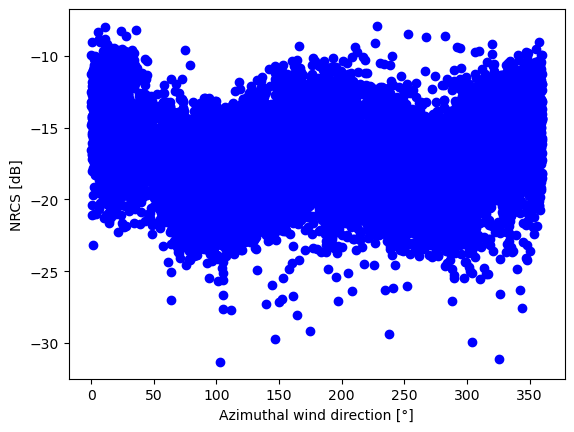

In [72]:
wdir_az = df_7ms['wdir_az']
macs_Im = df_7ms['macs_Im_lambda_max=50.0']
NRCS = df_7ms['sigma0_dB_filt']
plt.scatter(wdir_az, NRCS, color='blue')
plt.xlabel('Azimuthal wind direction [°]')
plt.ylabel('NRCS [dB]')
plt.show()

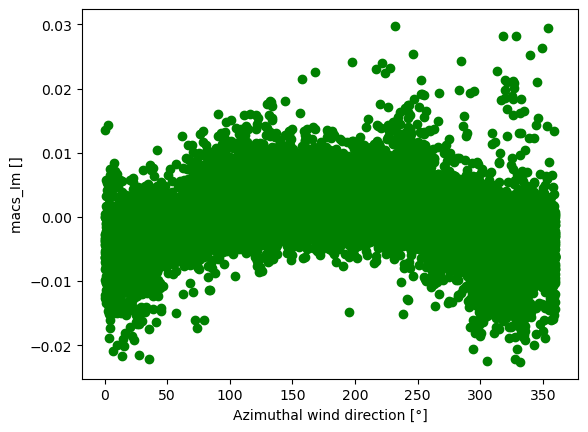

In [73]:
plt.scatter(wdir_az, macs_Im, color='green')
plt.xlabel('Azimuthal wind direction [°]')
plt.ylabel('macs_Im []')
plt.show()

### Histogram to discretise incidence angles 

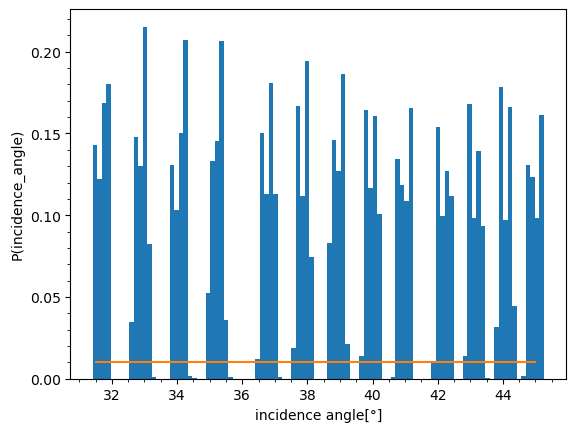

array([0.14270585, 0.12202972, 0.16865237, 0.18000397, 0.        ,
       0.        , 0.        , 0.        , 0.03446022, 0.14797624,
       0.13013801, 0.21527502, 0.08229911, 0.00081083, 0.        ,
       0.        , 0.        , 0.13094884, 0.10338066, 0.15000331,
       0.20716674, 0.00162166, 0.00040541, 0.        , 0.        ,
       0.05270387, 0.13338132, 0.14554375, 0.20676132, 0.03608188,
       0.00081083, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01216243, 0.15000331, 0.11270519, 0.1808148 ,
       0.11311061, 0.00121624, 0.        , 0.        , 0.01905447,
       0.1666253 , 0.11148895, 0.19419348, 0.07459624, 0.        ,
       0.        , 0.        , 0.08310994, 0.14594917, 0.12689469,
       0.1864906 , 0.02148696, 0.        , 0.        , 0.0141895 ,
       0.16459823, 0.11675933, 0.16054409, 0.10054276, 0.        ,
       0.        , 0.00081083, 0.13459757, 0.11838099, 0.10865105,
       0.16581447, 0.        , 0.        , 0.        , 0.     

array([31.419573  , 31.55796013, 31.69634726, 31.83473439, 31.97312152,
       32.11150865, 32.24989578, 32.38828291, 32.52667004, 32.66505717,
       32.8034443 , 32.94183143, 33.08021856, 33.21860569, 33.35699282,
       33.49537995, 33.63376708, 33.77215421, 33.91054134, 34.04892847,
       34.1873156 , 34.32570273, 34.46408986, 34.60247699, 34.74086412,
       34.87925125, 35.01763838, 35.15602551, 35.29441264, 35.43279977,
       35.5711869 , 35.70957403, 35.84796116, 35.98634829, 36.12473542,
       36.26312255, 36.40150968, 36.53989681, 36.67828394, 36.81667107,
       36.9550582 , 37.09344533, 37.23183246, 37.37021959, 37.50860672,
       37.64699385, 37.78538098, 37.92376811, 38.06215524, 38.20054237,
       38.3389295 , 38.47731663, 38.61570376, 38.75409089, 38.89247802,
       39.03086515, 39.16925228, 39.30763941, 39.44602654, 39.58441367,
       39.7228008 , 39.86118793, 39.99957506, 40.13796219, 40.27634932,
       40.41473645, 40.55312358, 40.69151071, 40.82989784, 40.96

In [107]:
incidence = df_7ms['incidence']
plt.hist(incidence, bins=100, density=True)
plt.plot([31.5, 45],[0.01,0.01])
plt.xlabel('incidence angle[°]')
plt.ylabel('P(incidence_angle)')
plt.minorticks_on()
plt.show()

hist, bins = np.histogram(incidence, bins=100, density=True)
display(hist, bins)

In [119]:
interv = [bins[i] for i in range(len(hist)) if hist[i] > 0.01]
display(interv)
interv2 = []
temp_val = []
for i in range(len(interv)-1):
    init_interv = interv[i]
    end_interv = interv[i+1]
    temp_val.append(init_interv)
    if end_interv - init_interv > 0.4:
        interv2.append(np.mean(temp_val))
        temp_val = []

display(interv2, len(interv2))

[31.419573,
 31.55796013,
 31.69634726,
 31.83473439,
 32.52667004,
 32.66505717,
 32.8034443,
 32.94183143,
 33.08021856,
 33.77215421,
 33.91054134,
 34.04892847,
 34.1873156,
 34.87925125,
 35.01763838,
 35.15602551,
 35.29441264,
 35.43279977,
 36.40150968,
 36.53989681,
 36.67828394,
 36.81667107,
 36.955058199999996,
 37.50860672,
 37.64699385,
 37.78538098,
 37.92376811,
 38.062155239999996,
 38.61570376,
 38.75409089,
 38.89247802,
 39.03086515,
 39.16925228,
 39.58441367,
 39.7228008,
 39.86118793,
 39.99957506,
 40.137962189999996,
 40.69151071,
 40.82989784,
 40.96828497,
 41.1066721,
 41.79860775,
 41.93699488,
 42.07538201,
 42.21376914,
 42.35215627,
 42.76731766,
 42.90570479,
 43.04409192,
 43.18247905,
 43.320866179999996,
 43.73602757,
 43.8744147,
 44.01280183,
 44.15118896,
 44.28957609,
 44.70473748,
 44.843124610000004,
 44.98151174,
 45.11989887]

[31.627153694999997,
 32.8034443,
 33.979734905,
 35.15602551,
 36.67828393999999,
 37.78538098,
 38.89247802,
 39.86118793,
 40.899091405,
 42.07538201,
 43.04409191999999,
 44.012801829999994]

12